# Applying gradient ascent
An example of learning through gradient ascent (gradient descent can also be used) 

Implement a Multilayer Perceptron (no Libraries)

Dataset : The Iris Flower Dataset
The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica, and Iris versicolor).

Four features were measured from each sample, the length and the width of the sepals and petals, in centimeters.        Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other.

For this example, I will implement a multilayer perceptron without any Python libraries. However, to help us format and manipulate the iris data set, we will use numpy, matplotlib,and scikit-learn libraries.

In [34]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import random 

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris_data = load_iris()

%matplotlib inline

# Analysis about the dataset

In [178]:
print(iris_data['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

Text(0.5, 1.0, 'Petal Sample')

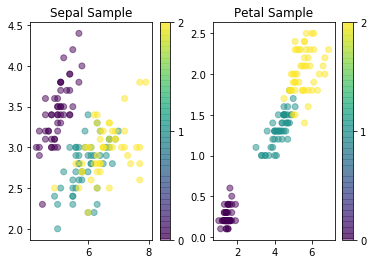

In [179]:
n_samples, n_features = iris_data.data.shape

plt.subplot(1, 2, 1)
scatter_plot = plt.scatter(iris_data.data[:,0], iris_data.data[:,1], alpha=0.5, 
                           c=iris_data.target) 
plt.colorbar(ticks=([0, 1, 2]))
plt.title('Sepal Sample')

plt.subplot(1, 2, 2)
scatter_plot_2 = plt.scatter(iris_data.data[:,2], iris_data.data[:,3], alpha=0.5, 
                           c=iris_data.target)
plt.colorbar(ticks=([0, 1, 2]))
plt.title('Petal Sample')

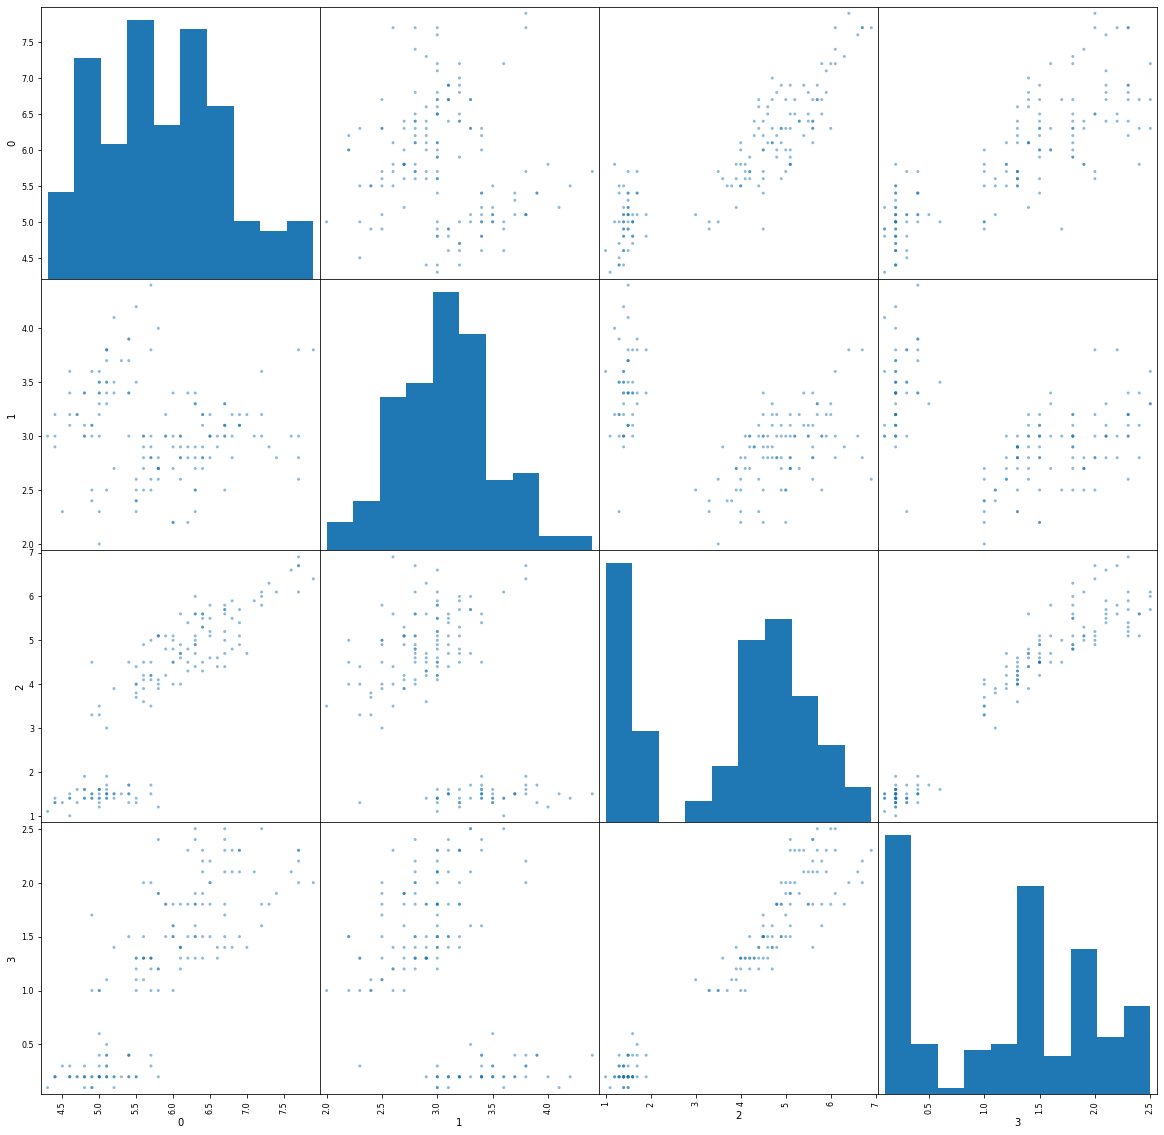

In [186]:
pd.plotting.scatter_matrix(pd.DataFrame(iris_data['data']), alpha=0.5, figsize=(20, 20))
plt.show()

In [188]:
def feed_forward(X,W1,b1,W2,b2):
    #Z = np.tanh(X.dot(W1)+b1)
    Z = 1/(1+np.exp(-X.dot(W1)-b1))
    A = Z.dot(W2) + b2
    exp_A = np.exp(A)
    Y = exp_A/exp_A.sum(axis = 1,keepdims = True)
    #print(Y)
    return Y,Z

In [187]:
def classification_rate(Y,P):
    n_correct = 0
    n_total = 0
    for i in range(len(Y)):
        n_total +=1
        if Y[i] == P[i]:
            n_correct +=1
    return float(n_correct)/n_total

In [4]:
def cost_fn(T,Y):
    tot = T*(np.log(Y))
    return tot.sum()

In [85]:
def derivative_w2(T,P,Z):
    return Z.T.dot(T-P)

In [6]:
def derivative_b2(T,P):
    return (T-P).sum(axis = 0)

In [7]:
def derivative_w1(X,Z,T,P,W2):
    w = (T-P).dot(W2.T)*Z*(1-Z)
    return X.T.dot(w)

In [8]:
def derivative_b1(T,P,W2,Z):
    return((T-P).dot(W2.T)*Z*(1-Z)).sum(axis = 0)

Separating our data set as train and test using train_test_split

In [190]:
def data():
    iris_data = load_iris()
    train_x = iris_data.data
    train_y = iris_data.target
    x_train, x_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.33, random_state=42)
    return x_train,y_train, x_test,y_test

In [177]:
x_train,y_train, x_test,y_test = data()
y_train.shape

(100,)

Text(0, 0.5, 'petal width (cm)')

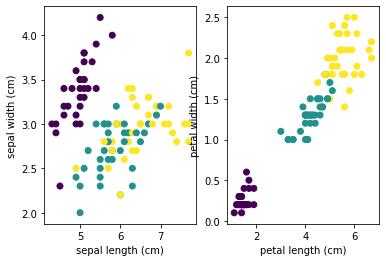

In [132]:
x_train,y_train, x_test,y_test = data()
plt.subplot(1, 2, 1)
plt.scatter(x_train[:,0],x_train[:,1],c=y_train,cmap=cm.viridis)
plt.xlabel(iris_data.feature_names[0])
plt.ylabel(iris_data.feature_names[1])

plt.subplot(1, 2, 2)
plt.scatter(x_train[:,2],x_train[:,3],c=y_train,cmap=cm.viridis)
plt.xlabel(iris_data.feature_names[2])
plt.ylabel(iris_data.feature_names[3])


Text(0, 0.5, 'petal width (cm)')

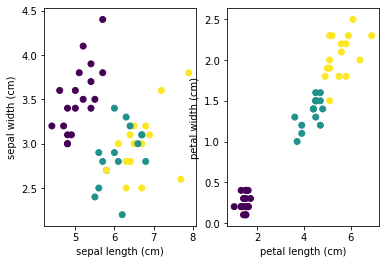

In [133]:
plt.subplot(1, 2, 1)
plt.scatter(x_test[:,0],x_test[:,1],c=y_test,cmap=cm.viridis)
plt.xlabel(iris_data.feature_names[0])
plt.ylabel(iris_data.feature_names[1]) 

plt.subplot(1, 2, 2)
plt.scatter(x_test[:,2],x_test[:,3],c=y_test,cmap=cm.viridis)
plt.xlabel(iris_data.feature_names[2])
plt.ylabel(iris_data.feature_names[3])

epoch : 0 cost: -114.75049359967264 classification rate 0.35
epoch : 100 cost: -110.575219628627 classification rate 0.37
epoch : 200 cost: -109.54777750476028 classification rate 0.48
epoch : 300 cost: -109.15917596149902 classification rate 0.35
epoch : 400 cost: -108.92171929442509 classification rate 0.36
epoch : 500 cost: -108.71904028313006 classification rate 0.37
epoch : 600 cost: -108.51099080816263 classification rate 0.37
epoch : 700 cost: -108.27129589911988 classification rate 0.36
epoch : 800 cost: -107.968336527314 classification rate 0.35
epoch : 900 cost: -107.55186048424186 classification rate 0.35
epoch : 1000 cost: -106.94033634759361 classification rate 0.35
epoch : 1100 cost: -106.02672160177242 classification rate 0.62
epoch : 1200 cost: -104.73870444023099 classification rate 0.66
epoch : 1300 cost: -103.09955726773944 classification rate 0.66
epoch : 1400 cost: -101.16691126911616 classification rate 0.66
epoch : 1500 cost: -98.96986474184183 classification rat

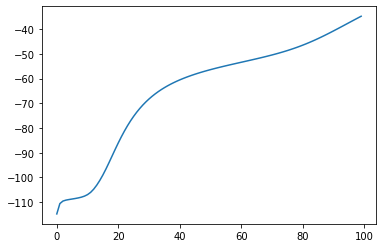

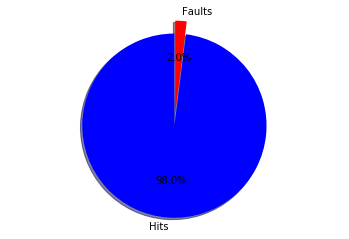

In [192]:
def main():
    
    X,T,x_test,y_test = data()
    p = np.zeros((T.shape[0],3))
    for i in range(len(T)):
        if T[i] == 0:
            p[i,0]=1
        elif T[i] ==1:
            p[i,1] = 1
        else :
            p[i,2] = 1
    D = 4
    M = 3
    K = 3
    
    W1 = np.random.randn(D,M) # from samples to hidden layer weight
    b1 = np.random.randn(M) # bias of the first hidden layer
    W2 = np.random.randn(M,K) # weigth from hidden layer to the output
    b2 = np.random.randn(K)
        
    
    learning_rate = 10e-5
    costs = []
    for epoch in range(10000):
        P,Z = feed_forward(X,W1,b1,W2,b2)
        
        if epoch %100 == 0:
            cost = cost_fn(p,P)
            g = np.argmax(P,axis = 1)
            r = classification_rate(T,g)
            print ("epoch :",epoch,"cost:",cost,"classification rate",r)
            costs.append(cost)
            
        W2 += learning_rate*derivative_w2(p,P,Z)
        b2 += learning_rate*derivative_b2(p,P)
        W1 += learning_rate*derivative_w1(X,Z,p,P,W2)
        b1 += learning_rate*derivative_b1(p,P,W2,Z)
            
    plt.plot(costs)
    
    prediction_test(x_test,y_test,W1,b1,W2,b2)
    
    
if __name__ == '__main__':
    main()

In [151]:
def prediction_test(x_test,y_test,W1,b1,W2,b2):
    truth = []
    hits = 0
    faults = 0
    labels = 'Hits', 'Faults'
    sizes = [96.5, 3.3]
    explode = (0, 0.14)
    P,hidden = feed_forward(x_test,W1,b1,W2,b2)
    pred = np.argmax(P,axis = 1)
    
    for i in range(len(pred)):
        if pred[i]==y_test[i]:
            hits+=1
        else : faults+=1
            
    truth.append(hits)
    truth.append(faults)
    fig1, ax1 = plt.subplots();
    ax1.pie(truth, explode=explode,colors=['blue','red'],labels=labels, autopct='%1.1f%%',
    shadow=True, startangle=90)
    ax1.axis('equal')
    plt.show()

In [54]:
X.shape,T.shape

((100, 4), (100,))

In [79]:
 X,T = data()
    
D = 4
M = 3
K = 3
p = np.zeros((T.shape[0],3))
for i in range(len(T)):
    if T[i] == 0:
        p[i,0]=1
    elif T[i] ==1:
        p[i,1] = 1
    else :
        p[i,2] = 1
W1 = np.random.randn(D,M) # from samples to hidden layer weight
b1 = np.random.randn(M) # bias of the first hidden layer
W2 = np.random.randn(M,K) # weigth from hidden layer to the output
b2 = np.random.randn(K)
P,Z = feed_forward(X,W1,b1,W2,b2)
#print(p)

In [93]:
p.shape,W1.shape,b1.shape,W2.shape,b2.shape

((100, 3), (4, 3), (3,), (3, 3), (3,))

In [97]:
Z.shape,P.shape

((100, 3), (100, 3))

In [95]:
np.argmax(P,axis = 1)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [118]:
x,y = data()
z,p = feed_forward(x,W1,b1,W2,b2)
pred = np.argmax(p,axis = 1)
y

array([1, 2, 1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0,
       2, 2, 1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 1, 2,
       2, 1, 0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2,
       1, 2, 1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2,
       1, 2, 1, 1, 2, 2, 0, 1, 2, 0, 1, 2])

In [156]:
pred = 100
hits = 0
faults = 0
for i in range(pred):
        if i%2==0:
            hits+=1
        else : faults+=1

In [168]:
h=0
f=0
[h+1 if i%2==0 else f+1 for i in range(5)]

[1, 1, 1, 1, 1]

In [161]:
'Yes' if 'fruit' == 'Apple' else 'No'

'No'